In [180]:
   import pandas as pd
   import numpy as np
   from sklearn import preprocessing
   from sklearn.cross_validation import train_test_split
   from sklearn import metrics
   from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
   from sklearn.metrics import confusion_matrix,average_precision_score,recall_score
   import seaborn as sns
   %matplotlib inline

In [181]:
df=pd.read_csv("/Users/kvsajith/Downloads/Default_On_Payment.csv")

/Users/kvsajith/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40121 entries, 0 to 40120
Data columns (total 22 columns):
Customer_ID                    40120 non-null float64
Status_Checking_Acc            40121 non-null object
Duration_in_Months             40121 non-null object
Credit_History                 40121 non-null object
Purposre_Credit_Taken          40120 non-null object
Credit_Amount                  40120 non-null object
Savings_Acc                    40120 non-null object
Years_At_Present_Employment    40120 non-null object
Inst_Rt_Income                 40120 non-null float64
Marital_Status_Gender          40120 non-null object
Other_Debtors_Guarantors       40120 non-null object
Current_Address_Yrs            40120 non-null float64
Property                       40119 non-null object
Age                            40119 non-null float64
Other_Inst_Plans               40119 non-null object
Housing                        40119 non-null object
Num_CC                         40119 no

In [183]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [184]:
df.shape

(40121, 22)

In [185]:
df.isnull().sum().sum()

29

In [186]:
pd.isnull(df).any()

Customer_ID                     True
Status_Checking_Acc            False
Duration_in_Months             False
Credit_History                 False
Purposre_Credit_Taken           True
Credit_Amount                   True
Savings_Acc                     True
Years_At_Present_Employment     True
Inst_Rt_Income                  True
Marital_Status_Gender           True
Other_Debtors_Guarantors        True
Current_Address_Yrs             True
Property                        True
Age                             True
Other_Inst_Plans                True
Housing                         True
Num_CC                          True
Job                             True
Dependents                      True
Telephone                       True
Foreign_Worker                  True
Default_On_Payment              True
dtype: bool

In [187]:
pd.isnull(df).sum()

Customer_ID                    1
Status_Checking_Acc            0
Duration_in_Months             0
Credit_History                 0
Purposre_Credit_Taken          1
Credit_Amount                  1
Savings_Acc                    1
Years_At_Present_Employment    1
Inst_Rt_Income                 1
Marital_Status_Gender          1
Other_Debtors_Guarantors       1
Current_Address_Yrs            1
Property                       2
Age                            2
Other_Inst_Plans               2
Housing                        2
Num_CC                         2
Job                            2
Dependents                     2
Telephone                      2
Foreign_Worker                 2
Default_On_Payment             2
dtype: int64

In [188]:
df1=df.dropna(axis=0,how='any',thresh=None,subset=None,inplace=False)

In [189]:
df1.shape

(40119, 22)

In [190]:
df1.shape
type(df)
df.size
df.head()

(40119, 22)

pandas.core.frame.DataFrame

882662

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment
0,100015.0,A14,27,A32,A40,2570,A61,A73,3.0,A92,...,A121,21.0,A143,A151,1.0,A173,1.0,A191,A201,1.0
1,100031.0,A11,12,A34,A43,385,A61,A74,4.0,A92,...,A121,58.0,A143,A152,4.0,A172,1.0,A192,A201,0.0
2,100046.0,A12,13,A34,A43,882,A61,A72,4.0,A93,...,A121,23.0,A143,A152,2.0,A173,1.0,A191,A201,0.0
3,100103.0,A14,24,A32,A40,1393,A61,A73,2.0,A93,...,A121,31.0,A143,A152,1.0,A173,1.0,A192,A201,0.0
4,100104.0,A11,24,A32,A40,3123,A61,A72,4.0,A92,...,A122,27.0,A143,A152,1.0,A173,1.0,A191,A201,1.0


In [191]:
df1.describe()

,Customer_ID,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents,Default_On_Payment
count,40119.000000,40119.000000,40119.000000,40119.000000,40119.000000,40119.000000,40119.000000
mean,552084.523642,2.973379,2.845086,35.540442,1.407014,1.154889,0.299135
std,261363.936402,1.118012,1.103048,11.366368,0.577355,0.361804,0.457885
min,100015.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,325148.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,551443.000000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000
75%,778206.000000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,999961.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


In [192]:
pd.isnull(df1).any()
pd.isnull(df1).sum()
df1.info()

Customer_ID                    False
Status_Checking_Acc            False
Duration_in_Months             False
Credit_History                 False
Purposre_Credit_Taken          False
Credit_Amount                  False
Savings_Acc                    False
Years_At_Present_Employment    False
Inst_Rt_Income                 False
Marital_Status_Gender          False
Other_Debtors_Guarantors       False
Current_Address_Yrs            False
Property                       False
Age                            False
Other_Inst_Plans               False
Housing                        False
Num_CC                         False
Job                            False
Dependents                     False
Telephone                      False
Foreign_Worker                 False
Default_On_Payment             False
dtype: bool

Customer_ID                    0
Status_Checking_Acc            0
Duration_in_Months             0
Credit_History                 0
Purposre_Credit_Taken          0
Credit_Amount                  0
Savings_Acc                    0
Years_At_Present_Employment    0
Inst_Rt_Income                 0
Marital_Status_Gender          0
Other_Debtors_Guarantors       0
Current_Address_Yrs            0
Property                       0
Age                            0
Other_Inst_Plans               0
Housing                        0
Num_CC                         0
Job                            0
Dependents                     0
Telephone                      0
Foreign_Worker                 0
Default_On_Payment             0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40119 entries, 0 to 40119
Data columns (total 22 columns):
Customer_ID                    40119 non-null float64
Status_Checking_Acc            40119 non-null object
Duration_in_Months             40119 non-null object
Credit_History                 40119 non-null object
Purposre_Credit_Taken          40119 non-null object
Credit_Amount                  40119 non-null object
Savings_Acc                    40119 non-null object
Years_At_Present_Employment    40119 non-null object
Inst_Rt_Income                 40119 non-null float64
Marital_Status_Gender          40119 non-null object
Other_Debtors_Guarantors       40119 non-null object
Current_Address_Yrs            40119 non-null float64
Property                       40119 non-null object
Age                            40119 non-null float64
Other_Inst_Plans               40119 non-null object
Housing                        40119 non-null object
Num_CC                         40119 no

In [193]:
print('count of Labels')
df1.groupby('Default_On_Payment').size()

count of Labels


Default_On_Payment
0.0    28118
1.0    12001
dtype: int64

In [194]:
le=preprocessing.LabelEncoder()

In [195]:
le.fit(df1['Default_On_Payment'])

LabelEncoder()

In [196]:
dfn=le.transform(df1['Default_On_Payment'])

In [197]:
df1['Y']=dfn
df1.info()
df1.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40119 entries, 0 to 40119
Data columns (total 23 columns):
Customer_ID                    40119 non-null float64
Status_Checking_Acc            40119 non-null object
Duration_in_Months             40119 non-null object
Credit_History                 40119 non-null object
Purposre_Credit_Taken          40119 non-null object
Credit_Amount                  40119 non-null object
Savings_Acc                    40119 non-null object
Years_At_Present_Employment    40119 non-null object
Inst_Rt_Income                 40119 non-null float64
Marital_Status_Gender          40119 non-null object
Other_Debtors_Guarantors       40119 non-null object
Current_Address_Yrs            40119 non-null float64
Property                       40119 non-null object
Age                            40119 non-null float64
Other_Inst_Plans               40119 non-null object
Housing                        40119 non-null object
Num_CC                         40119 no

/Users/kvsajith/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Index(['Customer_ID', 'Status_Checking_Acc', 'Duration_in_Months',
       'Credit_History', 'Purposre_Credit_Taken', 'Credit_Amount',
       'Savings_Acc', 'Years_At_Present_Employment', 'Inst_Rt_Income',
       'Marital_Status_Gender', 'Other_Debtors_Guarantors',
       'Current_Address_Yrs', 'Property', 'Age', 'Other_Inst_Plans ',
       'Housing', 'Num_CC', 'Job', 'Dependents', 'Telephone', 'Foreign_Worker',
       'Default_On_Payment', 'Y'],
      dtype='object')

In [198]:
x_catg=df1.loc[:,('Status_Checking_Acc',
       'Credit_History', 'Purposre_Credit_Taken',
       'Savings_Acc', 'Years_At_Present_Employment',
       'Marital_Status_Gender', 'Other_Debtors_Guarantors',
       'Property','Other_Inst_Plans ',
       'Housing','Job','Telephone', 'Foreign_Worker')]

In [199]:
x_catg.head()

,Status_Checking_Acc,Credit_History,Purposre_Credit_Taken,Savings_Acc,Years_At_Present_Employment,Marital_Status_Gender,Other_Debtors_Guarantors,Property,Other_Inst_Plans,Housing,Job,Telephone,Foreign_Worker
0,A14,A32,A40,A61,A73,A92,A101,A121,A143,A151,A173,A191,A201
1,A11,A34,A43,A61,A74,A92,A101,A121,A143,A152,A172,A192,A201
2,A12,A34,A43,A61,A72,A93,A103,A121,A143,A152,A173,A191,A201
3,A14,A32,A40,A61,A73,A93,A103,A121,A143,A152,A173,A192,A201
4,A11,A32,A40,A61,A72,A92,A101,A122,A143,A152,A173,A191,A201


In [200]:
x_catg.shape

(40119, 13)

In [201]:
x_num=df1.loc[:,('Duration_in_Months','Inst_Rt_Income','Current_Address_Yrs',
                    'Age','Num_CC','Dependents')]

In [202]:
x_num.head()

,Duration_in_Months,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents
0,27,3.0,3.0,21.0,1.0,1.0
1,12,4.0,3.0,58.0,4.0,1.0
2,13,4.0,4.0,23.0,2.0,1.0
3,24,2.0,2.0,31.0,1.0,1.0
4,24,4.0,1.0,27.0,1.0,1.0


In [203]:
x_num1=pd.get_dummies(x_catg)
x_num1.head()

,Status_Checking_Acc_A11,Status_Checking_Acc_A12,Status_Checking_Acc_A13,Status_Checking_Acc_A14,Credit_History_A30,Credit_History_A31,Credit_History_A32,Credit_History_A33,Credit_History_A34,Purposre_Credit_Taken_A40,...,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,Telephone_A191,Telephone_A192,Foreign_Worker_A201,Foreign_Worker_A202
0,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,1,0,1,0
1,1,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,1,1,0
2,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,1,0,1,0
3,0,0,0,1,0,0,1,0,0,1,...,1,0,0,0,1,0,0,1,1,0
4,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,1,0,1,0,1,0


In [204]:
y=df1['Y']
y.head()

0    1
1    0
2    0
3    0
4    1
Name: Y, dtype: int64

In [205]:
x_num1=pd.get_dummies(x_catg)

In [206]:
x.head()

,Status_Checking_Acc_A11,Status_Checking_Acc_A12,Status_Checking_Acc_A13,Status_Checking_Acc_A14,Credit_History_A30,Credit_History_A31,Credit_History_A32,Credit_History_A33,Credit_History_A34,Purposre_Credit_Taken_A40,...,Telephone_A191,Telephone_A192,Foreign_Worker_A201,Foreign_Worker_A202,Duration_in_Months,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents
0,0,0,0,1,0,0,1,0,0,1,...,1,0,1,0,27,3.0,3.0,21.0,1.0,1.0
1,1,0,0,0,0,0,0,0,1,0,...,0,1,1,0,12,4.0,3.0,58.0,4.0,1.0
2,0,1,0,0,0,0,0,0,1,0,...,1,0,1,0,13,4.0,4.0,23.0,2.0,1.0
3,0,0,0,1,0,0,1,0,0,1,...,0,1,1,0,24,2.0,2.0,31.0,1.0,1.0
4,1,0,0,0,0,0,1,0,0,1,...,1,0,1,0,24,4.0,1.0,27.0,1.0,1.0


In [207]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40119 entries, 0 to 40119
Data columns (total 60 columns):
Status_Checking_Acc_A11            40119 non-null uint8
Status_Checking_Acc_A12            40119 non-null uint8
Status_Checking_Acc_A13            40119 non-null uint8
Status_Checking_Acc_A14            40119 non-null uint8
Credit_History_A30                 40119 non-null uint8
Credit_History_A31                 40119 non-null uint8
Credit_History_A32                 40119 non-null uint8
Credit_History_A33                 40119 non-null uint8
Credit_History_A34                 40119 non-null uint8
Purposre_Credit_Taken_A40          40119 non-null uint8
Purposre_Credit_Taken_A41          40119 non-null uint8
Purposre_Credit_Taken_A410         40119 non-null uint8
Purposre_Credit_Taken_A42          40119 non-null uint8
Purposre_Credit_Taken_A43          40119 non-null uint8
Purposre_Credit_Taken_A44          40119 non-null uint8
Purposre_Credit_Taken_A45          40119 non-null u

In [208]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape
type(train_x)

(30089, 60)

(10030, 60)

(30089,)

(10030,)

pandas.core.frame.DataFrame

In [209]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [210]:
log.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [211]:
log.coef_

array([[ 0.55869222,  0.22603072, -0.37887355, -1.11524134,  0.4314042 ,
         0.54713409, -0.18520621, -0.4463724 , -1.05635164,  0.68700663,
        -0.73691205, -0.50509666, -0.05130533, -0.22696485,  0.12485223,
         0.51511226,  0.70426911, -1.19431746, -0.02603583,  0.43628325,
         0.05341202,  0.09652419, -0.86374814, -0.43186327,  0.15105987,
         0.06271882, -0.06662436, -0.67746883, -0.17907746,  0.15472943,
        -0.11123477, -0.56210074, -0.19078587, -0.098852  ,  0.45177721,
        -1.06231716, -0.54857178, -0.22342048, -0.27234754,  0.33494784,
        -0.01536713, -0.09267094, -0.60135389,  0.15355315, -0.28043939,
        -0.58250572, -0.57306479, -0.05252527, -0.08228114, -0.00152075,
        -0.25483681, -0.45455515,  0.2627057 , -0.97209766,  0.04095197,
         0.23217415, -0.00568636, -0.01240785,  0.30233708,  0.1994204 ]])

In [212]:
coeff=pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(log.coef_))],axis=1)

In [213]:
coeff.columns=('Variable','Coeff')

In [214]:
coeff.sort_values('Variable',ascending=True)

,Variable,Coeff
57,Age,-0.012408
4,Credit_History_A30,0.431404
5,Credit_History_A31,0.547134
6,Credit_History_A32,-0.185206
7,Credit_History_A33,-0.446372
8,Credit_History_A34,-1.056352
56,Current_Address_Yrs,-0.005686
59,Dependents,0.199420
54,Duration_in_Months,0.040952
52,Foreign_Worker_A201,0.262706


In [215]:
classes=log.predict(test_x)
print(classes.size)
print('Positive cases in test data',test_y[test_y==1].shape[0])
print('Negative cases in test data',test_y[test_y==0].shape[0])

10030
Positive cases in test data 2999
Negative cases in test data 7031


In [216]:
print('Accuracy score')
print(metrics.accuracy_score(test_y,classes))
print('Precision/Recall Metrics')
print(metrics.classification_report(test_y,classes))
print('AUC')
auc=metrics.roc_auc_score(test_y,classes)
auc

Accuracy score
0.786839481555334
Precision/Recall Metrics
             precision    recall  f1-score   support

          0       0.82      0.90      0.86      7031
          1       0.69      0.52      0.59      2999

avg / total       0.78      0.79      0.78     10030

AUC


0.7109519130944373

Text(0.5,1,'ROCR CHART')

(0, 1)

(0, 1)

Text(0,0.5,'True +ve rate')

Text(0.5,0,'False +ve rate')

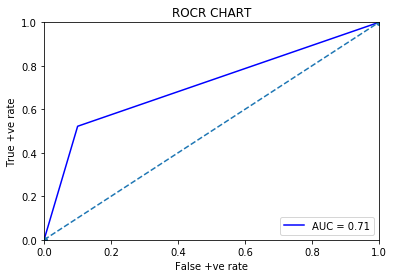

In [217]:
fpr, tpr, th=roc_curve(test_y,classes)
roc_auc=metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROCR CHART')
plt.plot(fpr,tpr,'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True +ve rate')
plt.xlabel('False +ve rate')
plt.show()

Confusion Matrix


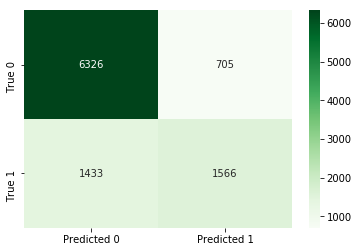

In [218]:
print("Confusion Matrix")
cf=metrics.confusion_matrix(test_y,classes)
lbl1=["Predicted 0","Predicted 1"]
lbl2=["True 0","True 1"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show();